In [ ]:
import matplotlib.pyplot as plt
import math

max_value = 50
delay = 24
output = []

for write in range(max_value):
    output.append((write - delay + max_value) % max_value)    

output_max = max(output)
output_min = min(output)

plt.plot(output)


In [ ]:
import matplotlib.pyplot as plt
import math

max_value = 100
output = []

for write in range(max_value):
    output.append((write + 1) % max_value)    

output_max = max(output)
output_min = min(output)

plt.plot(output)

In [ ]:
import math
SampleRate = 48000
Sampletime = 1/SampleRate
D1 = 2191
D2 = 2971
D3 = 3253
D4 = 3307
RT60D1 = (3*D1*Sampletime) / math.log(1/0.8)
RT60D2 = (3*D2*Sampletime) / math.log(1/0.8)
RT60D3 = (3*D3*Sampletime) / math.log(1/0.8)
RT60D4 = (3*D4*Sampletime) / math.log(1/0.8)

g1 = pow(10,(-3*D1*Sampletime/0.8))
g2 = pow(10,(-3*D2*Sampletime/0.8))
g3 = pow(10,(-3*D3*Sampletime/0.8))
g4 = pow(10,(-3*D4*Sampletime/0.8))

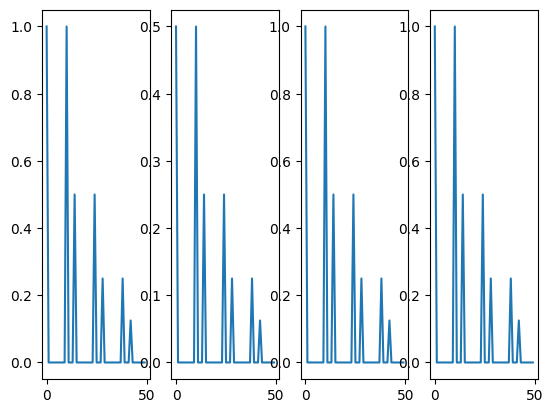

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

length = 50
Delay1 = 14
Feedback = 0.5

DelayLine1 = np.zeros(length)
DelayLine2 = np.zeros(length)
input = np.zeros(length)
input[0] = 1
input[10] = 1
output = np.zeros(length)
output2 = np.zeros(length)

DelayLine2A = np.zeros(length)
DelayLine2B = np.zeros(length)

for i in range(len(input)):
    output[i] = input[i] + DelayLine1[i-Delay1] * Feedback
    DelayLine1[i] = output[i]
    
    output2[i] = input[i] + DelayLine2[i-Delay1]
    DelayLine2[i] = output2[i] * Feedback
    

fig1, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4)
ax1.plot(DelayLine1)
ax2.plot(DelayLine2)
ax3.plot(output)
ax4.plot(output2)


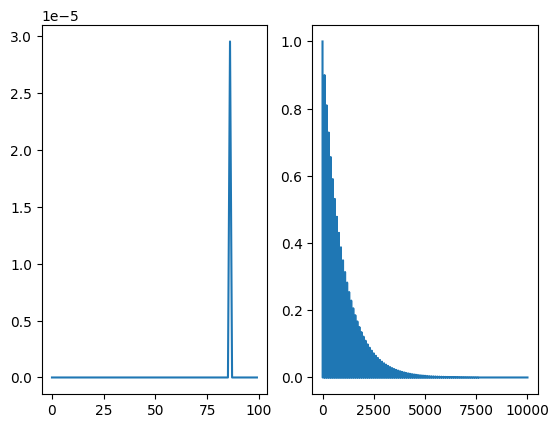

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 48000
block_size = 4

delay_length = 100
length = 10000
Delay1 = 14
Feedback = 0.9

DelayLine1 = np.zeros(delay_length)
DelayLine2 = np.zeros(delay_length)
DelayLine3 = np.zeros(delay_length)
DelayLine4 = np.zeros(delay_length)
input = np.zeros(length)
input[0] = 1
output = np.zeros(length)

for t in range(sample_rate):
    for i in range(block_size):
        ## Reverb algo:
        x1 = input[t]
        for a in range(10):
            read_idx = (i - Delay1 + delay_length) % delay_length
            output_delay = DelayLine1[read_idx] * Feedback
            DelayLine1[read_idx] = output_delay * -1


for i in range(len(input)):
    read_idx = (i - Delay1 + delay_length) % delay_length
    output[i] = input[i] + DelayLine1[read_idx] * Feedback
    DelayLine1[read_idx] = output[i]

fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(DelayLine1)
ax2.plot(output)


In [9]:
processor_speed = 480 * pow(10,6) ##480 MHz
samplerate = 48000
block_size = 2
call_rate = samplerate/block_size

available_cycles_per_block = processor_speed/call_rate

print(available_cycles_per_block/block_size)


10000.0
